In [1]:
import os
import numpy as np
import scipy
from skimage import io

path = 'G:\Masters\Sem_2\STA_5934\HW\HW3'

image = io.imread(os.path.join(path,'gw.bmp'), as_gray=True)

In [4]:
print(image.shape)
print(image)

(15, 419)
[[221 228 216 ...  76  93  93]
 [228 230 243 ...  86  93  76]
 [245 255 253 ...  91  98  86]
 ...
 [213 223 226 ...  61  74  74]
 [206 221 223 ...  76  81  81]
 [206 208 218 ...  96  93  93]]


In [ ]:
#Question 1 part (a)
List_min = []
List_min_row = []
for column in range(0,image.shape[1]):
    min = None
    min_row = None
    for row in range(0,image.shape[0]):
        if min is None or image[row][column] < min:
            min = image[row,column]
            min_row = row
    List_min.append(min)
    List_min_row.append(min_row)
print(List_min)
print(List_min_row)

norm_image = image.copy()
for column in range(0,image.shape[1]):
    for row in range(0,image.shape[0]):
        norm_image[row][column] = image[row][column] - List_min[column]

In [11]:
import matplotlib.pyplot as plt

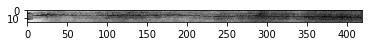

In [12]:
plt.imshow(image, cmap = 'gray' )
plt.show()

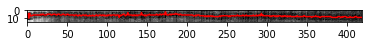

In [14]:
plt.imshow(norm_image, cmap = 'gray')
plt.plot(List_min_row, 'r')
plt.savefig('superimpose.png')
plt.show()

In [21]:
#Question 1 part (b)
def recSmooth(image, t, alpha, ptr, vt_list):
    if t == 0:
        vt_list[:,t] = image[:,0]
        return ptr, vt_list
    else:
        recSmooth(image, t-1, alpha, ptr, vt_list)
        for current_column_row in range(image.shape[0]):
            min_penalty = None
            penalty_list = []
            for prev_column_row in range(image.shape[0]):
                penalty = alpha * ((current_column_row - prev_column_row)**2) + vt_list[prev_column_row, t-1]
                penalty_list.append(penalty)
                if min_penalty == None or penalty < min_penalty:
                    min_penalty = penalty
                    ptr[current_column_row, t] = prev_column_row
            vt_list[current_column_row, t] = image[current_column_row,t] + min_penalty
        return ptr, vt_list
    
ptr = np.zeros(norm_image.shape)
vt_list = np.zeros(norm_image.shape)

ptr, vt_list = recSmooth(norm_image, norm_image.shape[1]-1, 2, ptr, vt_list)

#Question 1 part (c)
print("\n Minimum value of f(c) for alpha = 2 is",np.min(vt_list[:,image.shape[1]-1]))
ptr_list = []
ptr_list.append(np.argmin(vt_list[:,image.shape[1]-1]))
for column in reversed(range(1,image.shape[1])):
    ptr_list.append(ptr[int(ptr_list[len(ptr_list)-1]),column])
ptr_list = list(reversed(ptr_list))
print("\n Printing the backtrace for alpha = 2: ", ptr_list)


 Minimum value of f(c) for alpha = 2 is 322.0

 Printing the backtrace for alpha = 2:  [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 5.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5

In [23]:
#Question 1 part (d)
ptr2 = np.zeros(norm_image.shape)
vt_list2 = np.zeros(norm_image.shape)
ptr2, vt_list2 = recSmooth(norm_image, norm_image.shape[1]-1, 15, ptr2, vt_list2)
print("\n Minimum value of f(c) for alpha = 15 is", np.min(vt_list2[:,image.shape[1]-1]))
ptr_list2 = []
ptr_list2.append(np.argmin(vt_list2[:,image.shape[1]-1]))
for column in reversed(range(1,image.shape[1])):
    ptr_list2.append(ptr2[int(ptr_list2[len(ptr_list2)-1]),column])
ptr_list2 = list(reversed(ptr_list2))
print("\n Printing the backtrace for alpha = 15: ", ptr_list2)


 Minimum value of f(c) for alpha = 15 is 1232.0

 Printing the backtrace for alpha = 15:  [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0

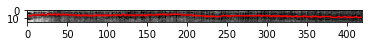

In [25]:
#Normalized image with the plot of the c overimposed in color for alpha = 2
plt.imshow(norm_image, cmap = 'gray')
plt.plot(ptr_list, 'r')
plt.savefig('superimpose_alpha_2.png')
plt.show()

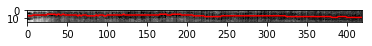

In [26]:
#Normalized image with the plot of the c overimposed in color for alpha = 15
plt.imshow(norm_image, cmap = 'gray')
plt.plot(ptr_list2, 'r')
plt.savefig('superimpose_alpha_15.png')
plt.show()

In [28]:
match = [List_min_row[i] == ptr_list[i] for i in range(len(List_min_row))]
sum(match)

396

In [29]:
match = [List_min_row[i] == ptr_list2[i] for i in range(len(List_min_row))]
sum(match)

335

In [38]:
"For alpha = 15, there will be more smoothing as penalty is larger. therefore the smooth curve will overlap less to  guidewire. Since,it overlaps at only 335 points compared to 396 for alpha = 2 as there is less smoothing for alpha =2."

'For alpha = 15, there will be more smoothing as penalty is larger. therefore the smooth curve will overlap less to  guidewire. Since,it overlaps at only 335 points compared to 396 for alpha = 2 as there is less smoothing for alpha =2.'